In [3]:
import numpy as np
import pandas as pd

# 绘图相关
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
 
# 数据建模
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
 
# 警告
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

导入数据


In [7]:
df = pd.read_csv("./data/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


查看数据维度

In [12]:
df.shape  # 训练集有81个特征，1460条数据

(1460, 81)

缺失值统计

In [9]:
df.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

描述统计信息

In [13]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


销售价格统计信息

In [14]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

分布直方图如下

我们明显感受到：

价格的分布偏离了正态分布

有明显的正偏度现象

有明显的峰值出现

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

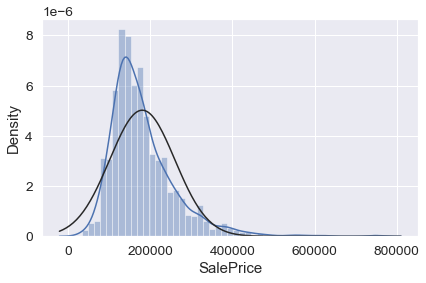

In [34]:
sns.distplot(df["SalePrice"],fit=norm)

SalePrice和数值型字段的关系

首先我们考察和居住面积的关系：

In [16]:
# 地面生活区(GrLivArea)
data = df[['SalePrice', 'GrLivArea']]
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


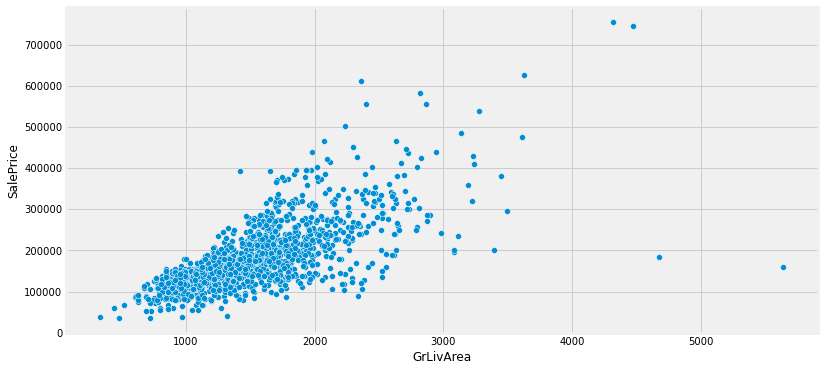

In [17]:

plt.figure(1,figsize=(12,6))
sns.scatterplot(x="GrLivArea",y="SalePrice",data=data)
plt.show()

In [18]:
# plotly版本
px.scatter(data, x="GrLivArea", y="SalePrice", trendline="ols")

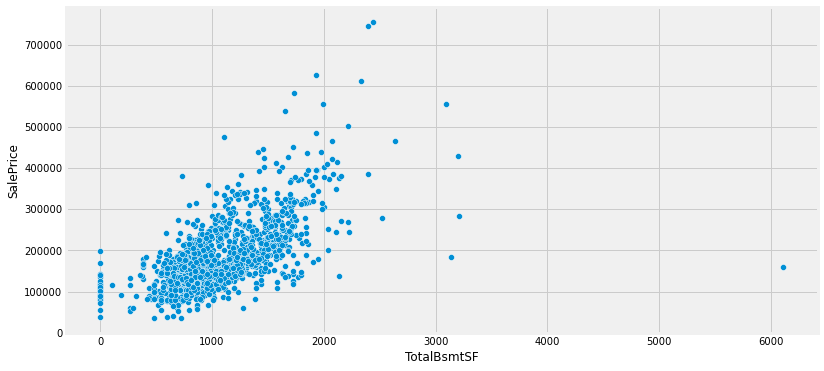

In [20]:
# 2、TotalBsmtSF 、地下室面积(GrLivArea)
data = df[["SalePrice","TotalBsmtSF"]]
 
plt.figure(1,figsize=(12,6))
sns.scatterplot(x="TotalBsmtSF",y="SalePrice",data=data)
plt.show()

小结：我们可以观察到这两个特征和销售价格之间是存在一定的线性关系。

价格和分类型字段的关系

房屋整体质量和房价的关系 OverallQual VS SalePrice

In [22]:
# 1、OverallQual：整体房屋质量
 
# 总共10个类别
df["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

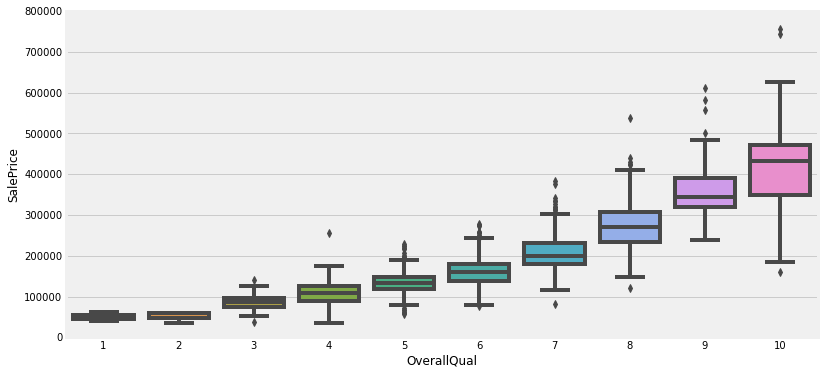

In [23]:
data = df[["SalePrice","OverallQual"]]
 
# 房屋整体质量和房价的关系
# 绘制子图：1号位
f,ax = plt.subplots(1,figsize=(12,6))
fig = sns.boxplot(x="OverallQual",y="SalePrice",data=data)
# y轴的刻度范围
fig.axis(ymin=0,ymax=800000)
plt.show()

住宅建造年份和销售价格的关系 YearBuilt VS SalePrice

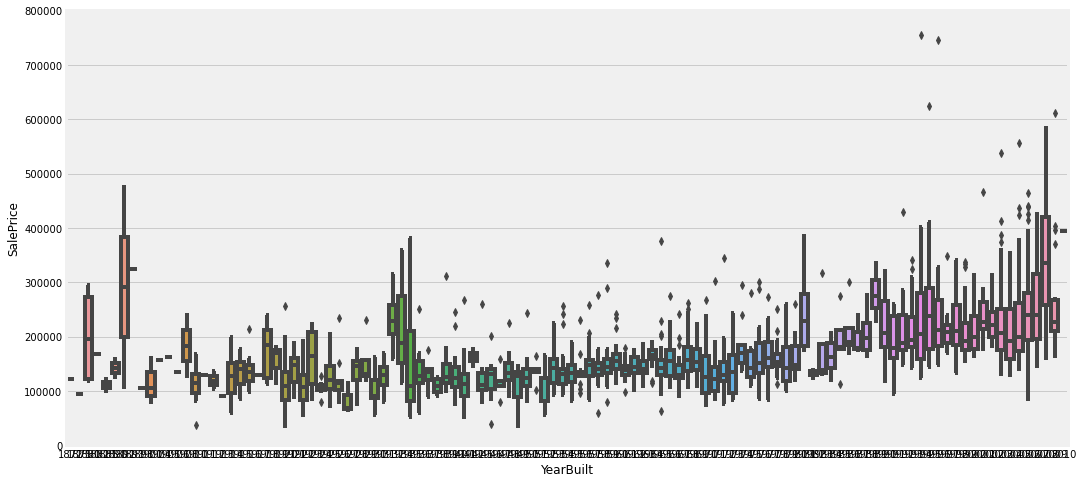

In [24]:
data = df[["SalePrice","YearBuilt"]]
 
# 建造年份和房价的关系
f,ax = plt.subplots(1,figsize=(16,8))
fig = sns.boxplot(x="YearBuilt",y="SalePrice",data=data)
# y轴的刻度范围
fig.axis(ymin=0,ymax=800000)
plt.show()

小结：销售价格和住宅的整体质量有很强的关系；但是和建筑年份的关系不大。但是在实际的买房过程中，我们还是会很在意年份

小结
对上面分析的一点小结：

地面生活区(GrLivArea)、地下室面积(GrLivArea)和销售价格SalePrice都是呈现正向的线性相关

房屋的整体质量(OverallQual)和建造年份(YearBuilt)好像也和销售价格线性相关。常识来说，整体的质量越好，价格越贵

相关性分析

为了探索众多属性之间的关系，进行如下的分析：

两两属性间的相关性（热力图）

销售价格saleprice和其他属性的关系（热力图）

关联性最大的属性间的关系（散点图）

整体相关性

分析每两个属性的相关性，并绘制热力图

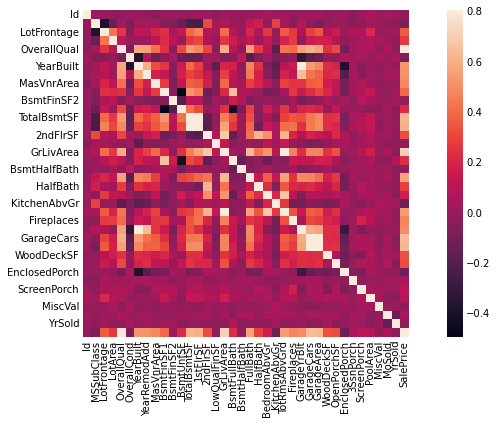

In [25]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

上图中有两个值得关注的点：

TotalBsmtSF and 1stFlrSF

GarageCar and GarageArea

这两组变量都是强相关的，我们后续的分析只取其中一个

缩放相关矩阵（销售价格saleprice）

从上面的热力图中选择和SalePrice相关性最强的前10个特征来绘制热力图

In [26]:
k = 10
corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [27]:
# 查看前10个相关性最强的特征
k = 10
corrmat.nlargest(k, 'SalePrice')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
FullBath,0.005587,0.131608,0.198769,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.027239,0.040380,0.352096,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897


In [29]:
# 取出前10个特征
cols = corrmat.nlargest(k, 'SalePrice').index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [30]:
# 选择10个特征的数据的转置，进行相关性系数绘制
cm = np.corrcoef(df[cols].values.T)
cm[:3]

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971]])

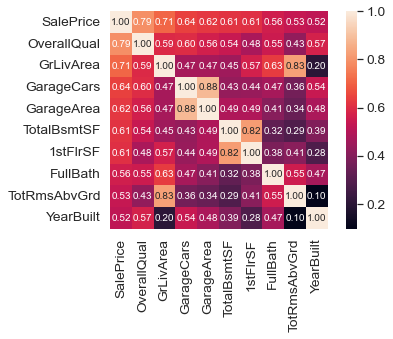

In [31]:
sns.set(font_scale=1.25)
hm = sns.heatmap(
    cm,  # 绘图数据
    cbar=True,  # 是否将颜色条作为图例，默认True
    annot=True,  # 是否显示数值
    square=True,  # 是否使热力图每个单元为正方形，默认为False
    fmt='.2f',  # 保留两位小数
    annot_kws={'size':10},
    xticklabels=cols.values, # xy轴设置
    yticklabels=cols.values)
 
plt.show()

小结1

通过上面的缩放热力图，我们可以得到下面的结论：

'OverallQual', 'GrLivArea' and 'TotalBsmtSF'是真的和'SalePrice'呈现强相关

'GarageCars' and 'GarageArea' 也是两个相关性比较强的特征；而且他们都是同时出现，后续选取GarageCars进行分析

建筑年限'YearBuilt'相对来说，相关性比较低